# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## Odalys Barrionuevo

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

### <span style="color:green"> Commento: </span>
<span style="color:green"> Verifichiamo l'attendibilità del generatore di numeri (quasi) casuali calcolando la media di M = 100000 numeri nell'intervallo [0,1) ($\langle r \rangle$), la varianza $\sigma^2$ e facendo un test del $\chi^2$. Per fare ciò sfruttiamo il metodo a blocchi che rende i dati indipendenti tra di loro, riducendo così la correlazione a zero rendendo possibile usare la deviazione standard della media per calcolare l'errore. Sotto vengono usati tre file di output con 100 dati (perché N = 100 è il numero dei blocchi) e i rispettivi errori. I primi due grafici sono stati centrati in zero. I valori attesi sono: $\langle r \rangle$ = 1/2, $\sigma^2$ = 1/12, $\chi^2$ = 100. </span>

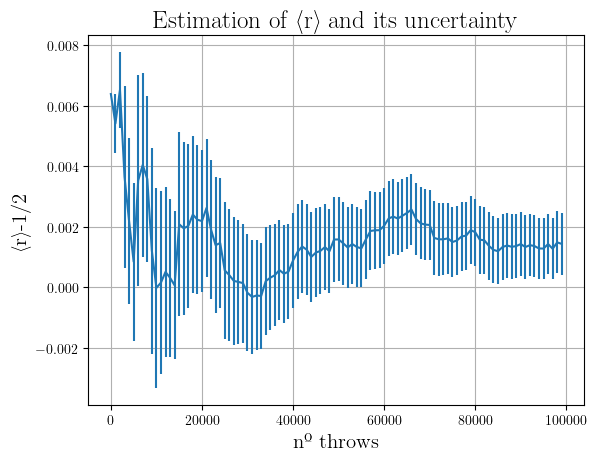

In [67]:
import matplotlib #per grafici
import matplotlib.pyplot as plt
import numpy as np #per avere i vettori
import math
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

M = 100000 #numeri casuali
N = 100    #blocchi
L = M/N    #numeri casuali per blocco
x = np.arange(N)

x = x*L
f, error = np.loadtxt("Esercizio01.1/output.txt", usecols = (0,1), delimiter = ' ', unpack = 'true')
plt.errorbar(x, f-0.5, yerr=error)

plt.title('Estimation of ⟨r⟩ and its uncertainty', fontsize = 18)
plt.xlabel(r'nº throws', fontsize = 15)
plt.ylabel(r'⟨r⟩-1/2', fontsize = 15)
plt.grid(True)

plt.show()


2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

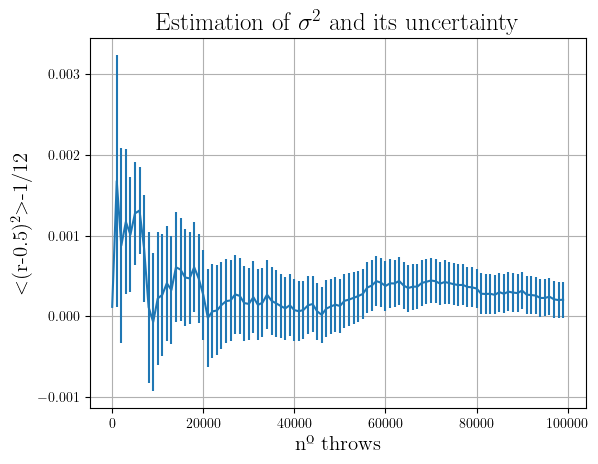

In [68]:
f1, error1 = np.loadtxt("Esercizio01.1/output1.txt", usecols = (0,1), delimiter = ' ', unpack = 'true')
plt.errorbar(x, f1-1/12, yerr=error1)

plt.title('Estimation of $\sigma$$^{2}$ and its uncertainty', fontsize = 18)
plt.xlabel('nº throws', fontsize = 15)
plt.ylabel('$<$(r-0.5)$^{2}$$>$-1/12', fontsize = 15)
plt.grid(True)

plt.show()

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

### <span style="color:green"> Commento: </span>
<span style="color:green"> Per il test del $\chi^2$ vengono generati $10^4$ numeri pseudo casuali nell'intervallo [0,1) che viene diviso in 100 sottointervalli. Viene successivamente calcolata la frequenza dei numeri che rientrano nel sottointevallo ($n_i$); si calcola il $\chi^2_j$ con $n = 10000$ e $M = 100$ usando la formula di sopra e si ripete il processo 100 volte. Alla fine si ottengono 100 valori del $\chi^2$ riportati nel grafico di sotto. Come ci aspettiamo abbiamo ottenuto dei valori del $\chi^2$ attorno a 100. </span>

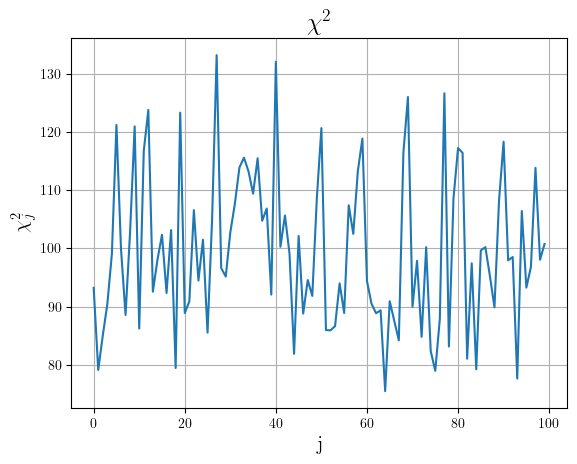

In [70]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

N = 100
x = np.arange(N)
y = np.loadtxt('Esercizio01.1/chi2.txt')

plt.plot(x,y)
plt.xlabel(r'j', fontsize = 15)
plt.ylabel(r'$\chi^{2}_j$', fontsize = 15)
plt.title (r'$\chi^{2}$', fontsize = 18)
plt.grid(True)

### <span style="color:green"> Commento: </span>
<span style="color:green"> Sotto viene riportato l'istogramma delle frequenze per ogni sottointervallo di [0,1). Si può vedere come il blocco contenente 100 sia quello più frequente. </span>

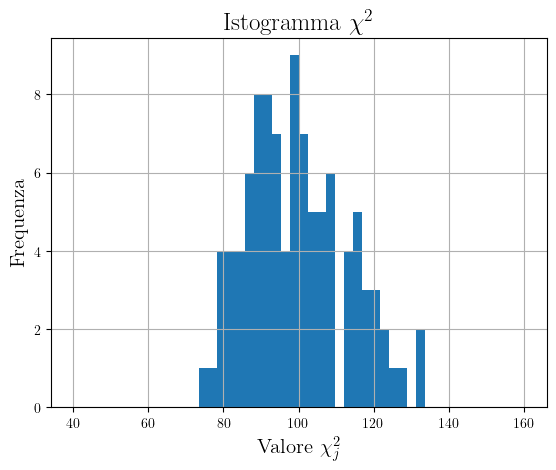

In [69]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

n_bins = 50
x = np.loadtxt('Esercizio01.1/chi2.txt')
n, bins, patches = plt.hist(x, n_bins, range=(40,160))

plt.xlabel(r'Valore $\chi^2_j$', fontsize = 15)
plt.ylabel(r'Frequenza', fontsize = 15)
plt.title(r'Istogramma $\chi^2$', fontsize = 18)
plt.grid(True)

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

### <span style="color:green"> Commento: </span>
<span style="color:green"> Per ottenere una variabile x che sia distribuita con un andamento esponenziale o lorentziano si sfrutta il teorema della funzione inversa. Se y è distribuita uniformemente in [0,1) allora x = $-1/\lambda\ln(1-y)$ (distribuzione esponenziale) e x = $\mu+\Gamma\tan[\pi(y-1/2)]$ (distribuzione di Cauchy-Lorentz). In seguito verifichiamo il teorema del $limite\ centrale^*$ usando tre distribuzioni (uniforme, esponenziale e lorentziana). Per fare ciò sono stati creati 4 file contenenti i dati delle somme di numeri casuali delle tre distribuzioni. Ciascun file corrisponde alle seguenti somme: N = 1, N = 2, N = 10, N = 100. Sotto vengono mostrate tre figure che riportano gli istogrammi di tutte le somme per ogni distribuzione. In particolare per le somme con N = 100 è stato fatto un fit con una funzione Gaussiana (per le distribuzioni uniforme e esponenziale) e una funzione Lorentziana (per la distribuzione di Cauchy-Lorentz).  </span>

<span style="color:green"> $^*$Il teorema del limite centrale afferma che la somma di un numero elevato di numeri casuali tende a seguire una distribuzione gaussiana a patto che la distribuzione da cui provengono i numeri abbia media e varianza finite. Dato che la distribuzione di Cauchy-Lorentz ha varianza infinita, questa non tenderà ad una distribuzione gaussiana (ciò non esclude la stabilità della distribuzione). Per questo motivo nell'ultimo fit è stata usata la funzione Lorentziana.  </span>

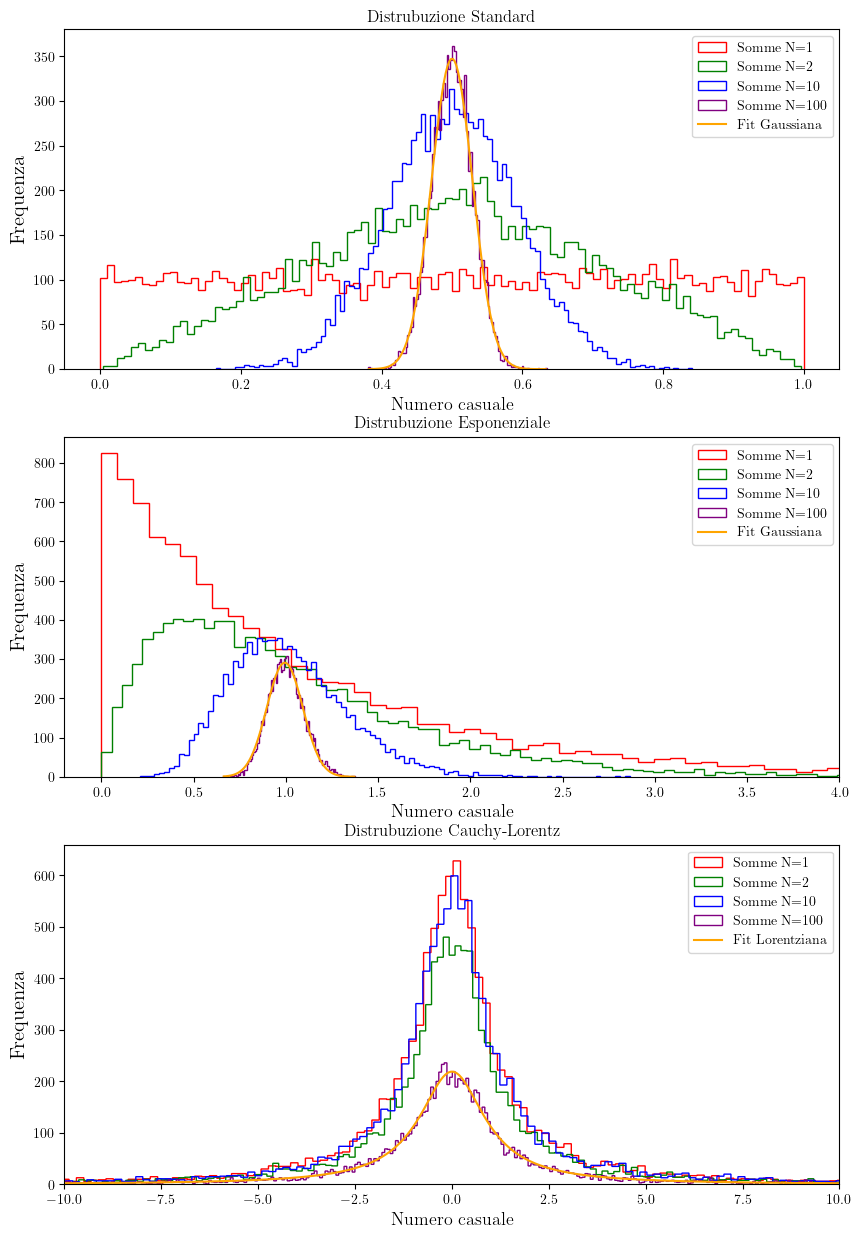

In [95]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#carico dati nei diversi vettori a seconda della distribuzione e a seconda del valore di N
stan1, exp1, lor1 = np.loadtxt("Esercizio01.2/somme1.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
stan2, exp2, lor2 = np.loadtxt("Esercizio01.2/somme2.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
stan10, exp10, lor10 = np.loadtxt("Esercizio01.2/somme10.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
stan100, exp100, lor100 = np.loadtxt("Esercizio01.2/somme100.txt", usecols=(0,1,2), delimiter=' ', unpack='true')

fig, (stan, exp, lor) = plt.subplots(3, 1, figsize=(10, 15))#creo 3 sottografici per le tre diverse distribuzioni

def f(x,a,b,c):  #funzione gaussiana per fare il fit
    return a * np.exp(-b*(x-c)**2)
def cl(x, a, b, c): #funzione lorentziana per fare il fit
    return (a / np.pi) * (b / ((x - c) ** 2 + b ** 2))


#istogrammi della distribuzione standard
bins=100
stan.hist(stan1, bins = bins, histtype="step", color = 'red', label = "Somme N=1")
stan.hist(stan2, bins = bins, histtype="step", color = 'green', label = "Somme N=2")
stan.hist(stan10, bins = bins, histtype="step", color = 'blue', label = "Somme N=10")
stan_values, bin_edges, _ = stan.hist(stan100, bins = bins, histtype="step", color = 'purple', label = "Somme N=100")
stan.title.set_text('Distrubuzione Standard')
stan.set_xlabel('Numero casuale', fontsize = 13)
stan.set_ylabel('Frequenza', fontsize = 15)

#fit gaussiana
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Centri dei bin
p_opt, p_cov = curve_fit(f, bin_centers, stan_values, p0=[max(stan_values), 1, np.mean(stan100)])
y_fit = f(bin_centers,p_opt[0],p_opt[1],p_opt[2])
stan.plot(bin_centers,y_fit, color='orange', label="Fit Gaussiana") # plotting fitted function

stan.legend(frameon=True)

#istogrammi della distribuzione esponenziale
exp.hist(exp1, bins = bins, histtype="step", color = 'red', label = "Somme N=1")
exp.hist(exp2, bins = bins, histtype="step", color = 'green', label = "Somme N=2")
exp.hist(exp10, bins = bins, histtype="step", color = 'blue', label = "Somme N=10")
exp_values, bin_edges1, _ = exp.hist(exp100, bins = bins, histtype="step", color = 'purple', label = "Somme N=100")
exp.set_xlim(-0.2, 4)
exp.title.set_text('Distrubuzione Esponenziale')
exp.set_xlabel('Numero casuale', fontsize = 13)
exp.set_ylabel('Frequenza', fontsize = 15)

#fit gaussiana
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2  # Centri dei bin
p_opt, p_cov = curve_fit(f, bin_centers1, exp_values, p0=[max(exp_values), 1, np.mean(exp100)])
y_fit1 = f(bin_centers1,p_opt[0],p_opt[1],p_opt[2])
exp.plot(bin_centers1,y_fit1, color='orange', label="Fit Gaussiana") # plotting fitted function

exp.legend(frameon=True)

#istogrammi della distribuzione di Cauchy-Lorentz
bins1 = 100000
bins2 = 1000000
lor.hist(lor1, bins = bins1, histtype="step", color = 'red', label = "Somme N=1")
lor.hist(lor2, bins = bins1, histtype="step", color = 'green', label = "Somme N=2")
lor.hist(lor10, bins = bins2, histtype="step", color = 'blue', label = "Somme N=10")
lor_values, bin_edges2, _ = lor.hist(lor100, bins = bins1, histtype="step", color = 'purple', label = "Somme N=100")
lor.set_xlim(-10, 10)
lor.title.set_text('Distrubuzione Cauchy-Lorentz')
lor.set_xlabel('Numero casuale', fontsize = 13)
lor.set_ylabel('Frequenza', fontsize = 15)

#fit lorentziana
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2  # Centri dei bin
p_opt, p_cov = curve_fit(cl, bin_centers2, lor_values, p0=[max(lor_values), 1, np.mean(lor100)])
y_fit2 = cl(bin_centers2,p_opt[0],p_opt[1],p_opt[2])
lor.plot(bin_centers2,y_fit2, color='orange', label="Fit Lorentziana") # plotting fitted function

lor.legend(frameon=True)

plt.show()



### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

### <span style="color:green"> Commento: </span>
 <span style="color:green"> Viene simulato un esperimento in cui viene lanciato ($10^5$ volte) un ago lungo L = 0.6 su un piano dotato di linee che distano tra loro d = 1. Lo scopo è quello di stimare il valore di $\pi$ usando la formula di sopra dove $N_{thr}$ è il numero totale di lanci e $N_{hit}$ è il numero di volte in cui l'ago interseca una linea. L'intersezione avviene quando la distanza tra il centro dell'ago e la linea più vicina è minore della proiezione di $\frac{L}{2}$ sull'asse verticale ($\frac{L}{2}\sin\theta$). </span> 
<span style="color:green"> L'angolo che assume l'ago varia da 0 a $\frac{\pi}{2}$ quindi per non usare la costante M_PI presente nella libreria cmath sono stati estratti due numeri casuali (x e y) tra [0, 1). Se questi soddisfavano la relazione $x^2 + y^2 < 1$ allora i valori venivano accettati e l'angolo che forma con l'origine (angolo tra 0 e $\frac{\pi}{2}$) veniva calcolato con: $\theta = \arccos(\frac{x}{x^2 + y^2})$. Sotto viene riportata la stima di $\pi$ centarto in zero per ogni blocco con il rispettivo errore. </span>

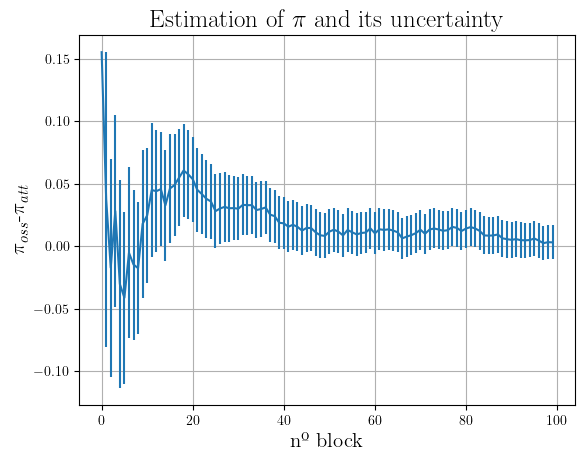

In [110]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

tot = 100000 #numeri casuali
N = 100    #blocchi
Z = M/N    #numeri casuali per blocco
x = np.arange(N)

f, error = np.loadtxt("Esercizio01.3/output.txt", usecols = (0,1), delimiter = ' ', unpack = 'true')
plt.errorbar(x, f-math.pi, yerr=error)

plt.title('Estimation of $\pi$ and its uncertainty', fontsize = 18)
plt.xlabel(r'nº block', fontsize = 15)
plt.ylabel(r'$\pi_{oss}$-$\pi_{att}$', fontsize = 15)
plt.grid(True)

plt.show()


### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
    What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
    At this point everything becomes clear:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?

### <span style="color:green"> Risposta: </span>
<span style="color:green"> N deve essere un sottomultiplo di M in modo tale da avere un numero uguale di steps per ogni blocco (M/N), inoltre M/N deve essere sufficientemente grande altrimenti la stima della media risulterebbe molto variabile il che porta ad una varianza più grande. Per di più se i dati sono correlati, scegliere M/N piccolo potrebbe non rompere questa correlazione. Se invece M/N è troppo grande, quindi N troppo piccolo, la stima dell'errore verrebbe fatto su poche osservazioni (N), quindi risulterebbe meno preciso. La scelta migliore è quindi avere M/N sufficientemente grande in modo tale che ogni blocco catturi caratteristiche importanti dei dati e allo stesso tempo scegliere N che non sia troppo piccolo in modo tale da avere abbastanza osservazioni per fare una buona stima dell'errore. </span>